In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("stock_data_2021.csv")
df.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits,Symbol
0,AAPL,02/01/2019,38.722500,39.712502,38.557499,39.480000,148158800,37.943260,0.0,0.0,AAPL
1,AAPL,03/01/2019,35.994999,36.430000,35.500000,35.547501,365248800,34.163818,0.0,0.0,AAPL
2,AAPL,04/01/2019,36.132500,37.137501,35.950001,37.064999,234428400,35.622257,0.0,0.0,AAPL
3,AAPL,07/01/2019,37.174999,37.207500,36.474998,36.982498,219111200,35.542973,0.0,0.0,AAPL
4,AAPL,08/01/2019,37.389999,37.955002,37.130001,37.687500,164101200,36.220535,0.0,0.0,AAPL


In [19]:
df.isnull().sum()

symbol         0
date           0
open           0
high           0
low            0
close          0
volume         0
adjclose       0
dividends      0
splits       986
Symbol         0
dtype: int64

In [2]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.set_index('date', inplace=True)


In [3]:
df.tail()

,symbol,open,high,low,close,volume,adjclose,dividends,splits,Symbol
date,,,,,,,,,,
2022-12-23,005930.KS,58200.0,58400.0,57700.0,58100.0,9829407,57121.50391,0.0,NaN,005930.KS
2022-12-26,005930.KS,58000.0,58100.0,57700.0,57900.0,6756411,56924.87500,0.0,NaN,005930.KS
2022-12-27,005930.KS,58000.0,58400.0,57900.0,58100.0,10667027,57121.50391,0.0,NaN,005930.KS
2022-12-28,005930.KS,57600.0,57600.0,56400.0,56600.0,14665410,55994.68359,361.0,NaN,005930.KS
2022-12-29,005930.KS,56000.0,56200.0,55300.0,55300.0,11295935,54708.58984,0.0,NaN,005930.KS


In [4]:
df.head()

,symbol,open,high,low,close,volume,adjclose,dividends,splits,Symbol
date,,,,,,,,,,
2019-01-02,AAPL,38.722500,39.712502,38.557499,39.480000,148158800,37.943260,0.0,0.0,AAPL
2019-01-03,AAPL,35.994999,36.430000,35.500000,35.547501,365248800,34.163818,0.0,0.0,AAPL
2019-01-04,AAPL,36.132500,37.137501,35.950001,37.064999,234428400,35.622257,0.0,0.0,AAPL
2019-01-07,AAPL,37.174999,37.207500,36.474998,36.982498,219111200,35.542973,0.0,0.0,AAPL
2019-01-08,AAPL,37.389999,37.955002,37.130001,37.687500,164101200,36.220535,0.0,0.0,AAPL


<Axes: xlabel='date'>

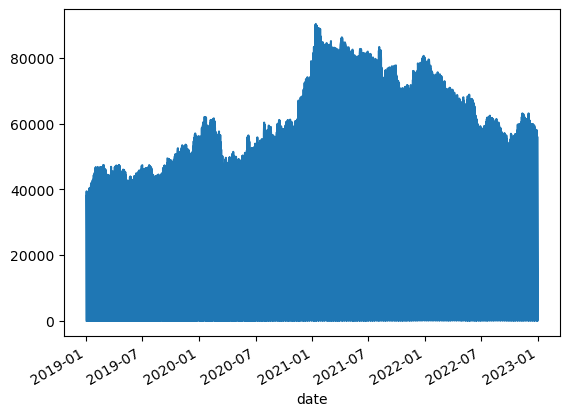

In [5]:
df["open"].plot()

In [6]:
# testing for stationary
from statsmodels.tsa.stattools import adfuller

In [7]:
test=adfuller(df["open"])

In [8]:
def adfuller_test(value):
    results=adfuller(value)
    labels=["AOF Test Statistic", "P-Value","#lag used","No. of observations used"]
    for value,label in zip(results,labels):
        print(label+':'+str(value))
        
    if results[1]<=0.05:
        print("stationary")
    else:
        print("not stationary")

In [9]:
adfuller_test(df["open"])

AOF Test Statistic:-0.8618813530129993
P-Value:0.8002661989758854
#lag used:1
No. of observations used:1992
not stationary


In [10]:
#differncing to make data stationary

df["seasonal"]=df["open"]-df["open"].shift(12)

In [11]:
df.head()

,symbol,open,high,low,close,volume,adjclose,dividends,splits,Symbol,seasonal
date,,,,,,,,,,,
2019-01-02,AAPL,38.722500,39.712502,38.557499,39.480000,148158800,37.943260,0.0,0.0,AAPL,NaN
2019-01-03,AAPL,35.994999,36.430000,35.500000,35.547501,365248800,34.163818,0.0,0.0,AAPL,NaN
2019-01-04,AAPL,36.132500,37.137501,35.950001,37.064999,234428400,35.622257,0.0,0.0,AAPL,NaN
2019-01-07,AAPL,37.174999,37.207500,36.474998,36.982498,219111200,35.542973,0.0,0.0,AAPL,NaN
2019-01-08,AAPL,37.389999,37.955002,37.130001,37.687500,164101200,36.220535,0.0,0.0,AAPL,NaN


In [12]:
df.tail()

,symbol,open,high,low,close,volume,adjclose,dividends,splits,Symbol,seasonal
date,,,,,,,,,,,
2022-12-23,005930.KS,58200.0,58400.0,57700.0,58100.0,9829407,57121.50391,0.0,NaN,005930.KS,-600.0
2022-12-26,005930.KS,58000.0,58100.0,57700.0,57900.0,6756411,56924.87500,0.0,NaN,005930.KS,-700.0
2022-12-27,005930.KS,58000.0,58400.0,57900.0,58100.0,10667027,57121.50391,0.0,NaN,005930.KS,-1300.0
2022-12-28,005930.KS,57600.0,57600.0,56400.0,56600.0,14665410,55994.68359,361.0,NaN,005930.KS,-2300.0
2022-12-29,005930.KS,56000.0,56200.0,55300.0,55300.0,11295935,54708.58984,0.0,NaN,005930.KS,-3600.0


In [13]:
adfuller_test(df["seasonal"].dropna())

AOF Test Statistic:-6.156012354562218
P-Value:7.36574423847156e-08
#lag used:24
No. of observations used:1957
stationary


<Axes: xlabel='date'>

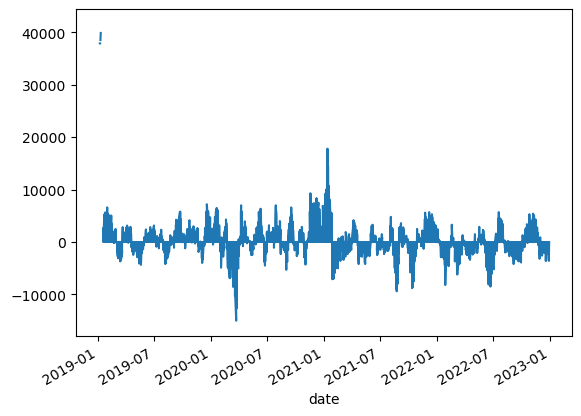

In [14]:
df["seasonal"].plot()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm


/Users/gouravdeepsingh/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


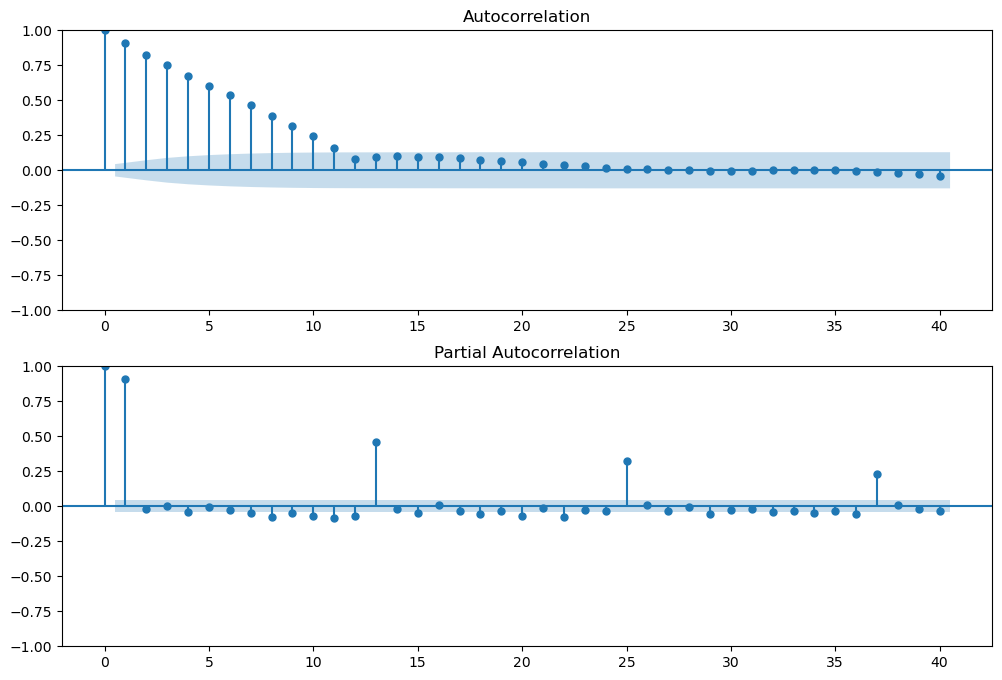

In [16]:
fig= plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df["seasonal"].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df["seasonal"].iloc[13:],lags=40,ax=ax2)

#pacf defines p and acf q, p=1 and q=1/

/var/folders/p6/zdvt0qkx57l_p6w973wn17740000gn/T/ipykernel_27185/3007153899.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p6/zdvt0qkx57l_p6w973wn17740000gn/T/ipykernel_27185/3007153899.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/gouravdeepsingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/goura

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67777D+03    |proj g|=  3.70996D+03

At iterate    5    f=  5.77537D+00    |proj g|=  6.30291D+00

At iterate   10    f=  2.77349D+00    |proj g|=  2.68700D-01

At iterate   15    f=  2.42680D+00    |proj g|=  7.85471D-02

At iterate   20    f=  2.35587D+00    |proj g|=  1.97778D-02

At iterate   25    f=  2.34429D+00    |proj g|=  1.55725D-02

At iterate   30    f=  2.34336D+00    |proj g|=  1.84601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/gouravdeepsingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



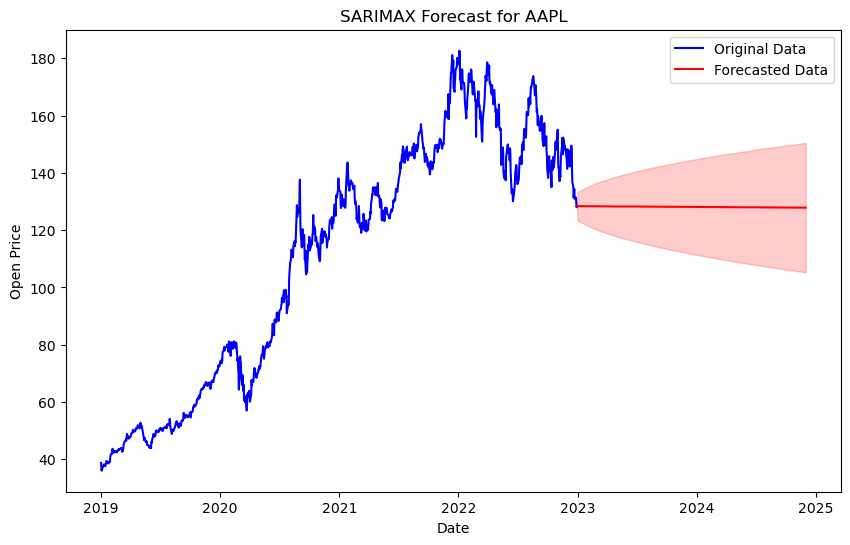

In [59]:
def stocks(selected_stock):
    # Mapping stock symbols
    stock_mapping = {"SAMSUNG": "005930.KS", "APPLE": "AAPL"}

    # Check if the entered symbol needs mapping
    selected_stock = stock_mapping.get(selected_stock.upper(), selected_stock.upper())

    # Filter data for the selected stock
    selected_stock_data = df[df['Symbol'] == selected_stock]

    # Make the 'date' column datetime
    selected_stock_data['date'] = pd.to_datetime(selected_stock_data['date'], format='%d/%m/%Y')

    # Set 'date' as the index
    selected_stock_data.set_index('date', inplace=True)

    # Make the data stationary
    selected_stock_data['seasonal'] = selected_stock_data['open'] - selected_stock_data['open'].shift(12)

    # Fit SARIMAX model
    model = sm.tsa.statespace.SARIMAX(selected_stock_data['open'], order=(1, 0, 1), seasonal_order=(1, 0,1, 12))
    results = model.fit()

    # Forecast
    forecast_steps = 24
    forecast = results.get_forecast(steps=forecast_steps)

    # Get confidence intervals
    confidence_intervals = forecast.conf_int()

    # Get predicted values
    predicted_values = forecast.predicted_mean

    # Get actual values for the forecast period
    actual_values = selected_stock_data['open'].iloc[-forecast_steps:]

    # Calculate R-squared
    r_squared = r2_score(actual_values, predicted_values)

    print(f"R-squared for {selected_stock}: {r_squared}")

    # Plot the original and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(selected_stock_data.index, selected_stock_data['open'], label='Original Data', color='blue')
    plt.plot(pd.date_range(selected_stock_data.index[-1], periods=forecast_steps, freq='M'), forecast.predicted_mean, color='red', label='Forecasted Data')
    plt.fill_between(pd.date_range(selected_stock_data.index[-1], periods=forecast_steps, freq='M'), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2)
    plt.title(f'SARIMAX Forecast for {selected_stock}')
    plt.xlabel('Date')
    plt.ylabel('Open Price')
    plt.legend()
    plt.show()

stocks("APPLE")  


In [5]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import statsmodels.api as sm


# Create Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Stock Price Forecast Dashboard"),
    
    dcc.Dropdown(
        id='company-dropdown',
        options=[
            {'label': 'Apple', 'value': 'AAPL'},
            {'label': 'Samsung', 'value': '005930.KS'},
        ],
        value='AAPL',  # Default value
        style={'width': '200px'}
    ),
    
    dcc.Graph(id='forecast-graph')
])

# Define callback to update the graph based on dropdown selection
@app.callback(
    Output('forecast-graph', 'figure'),
    [Input('company-dropdown', 'value')]
)
def update_graph(selected_company):
    selected_stock_data = df[df['Symbol'] == selected_company]
    selected_stock_data['date'] = pd.to_datetime(selected_stock_data['date'], format='%d/%m/%Y')
    selected_stock_data.set_index('date', inplace=True)
    selected_stock_data['seasonal'] = selected_stock_data['open'] - selected_stock_data['open'].shift(12)


    # Fit the model 
    model = sm.tsa.statespace.SARIMAX(selected_stock_data['open'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()

    # Forecast for the next 8 periods 
    forecast_steps = 8
    forecast = results.get_forecast(steps=forecast_steps)
    predicted_values = forecast.predicted_mean
    actual_values = selected_stock_data['open'][-forecast_steps:]  

    # Calculate MSE and RMSE
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = mse ** 0.5
    print('mse:',mse,'\n','rmse:',rmse)

    

    trace_actual = go.Scatter(
        x=actual_values.index,
        y=actual_values,
        mode='lines',
        name='Actual Data',
        marker=dict(color='blue')
    )
    
    trace_forecast = go.Scatter(
        x=pd.date_range(selected_stock_data.index[-1], periods=forecast_steps, freq='M'),
        y=predicted_values,
        mode='lines',
        name='Forecasted Data',
        marker=dict(color='red')
    )
    
    layout = go.Layout(
        title=f"Stock Price Forecast for {selected_company}",
        xaxis=dict(title='Date'),
        yaxis=dict(title='Open Price')
    )
    
    return {'data': [trace_actual, trace_forecast], 'layout': layout}


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/p6/zdvt0qkx57l_p6w973wn17740000gn/T/ipykernel_29412/2277314592.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p6/zdvt0qkx57l_p6w973wn17740000gn/T/ipykernel_29412/2277314592.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/gouravdeepsingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/goura

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45558D+00    |proj g|=  1.19935D-01

At iterate    5    f=  2.34654D+00    |proj g|=  1.18349D-02

At iterate   10    f=  2.33637D+00    |proj g|=  2.64008D-03

At iterate   15    f=  2.33463D+00    |proj g|=  2.95997D-03

At iterate   20    f=  2.33461D+00    |proj g|=  7.60182D-04

At iterate   25    f=  2.33458D+00    |proj g|=  1.22093D-04

At iterate   30    f=  2.33457D+00    |proj g|=  1.18365D-04

At iterate   35    f=  2.33457D+00    |proj g|=  1.71448D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/gouravdeepsingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

